In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


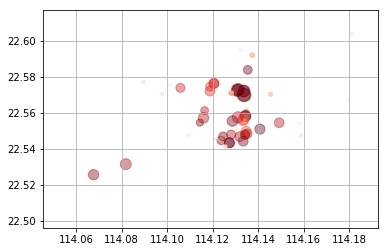

In [8]:
data = pd.read_csv('深圳罗湖二手房信息.csv',engine='python')
plt.scatter(data['经度'],data['纬度'],
            s = data['房屋单价']/500,
            c = data['参考总价'],cmap='Reds',
            alpha=0.4)#透明度
plt.grid()
#data.head()

In [12]:
#极差
def d_range(df,*clos):
    krange=[]
    for clo in clos:
        crange=df[clo].max()-df[clo].min()
        krange.append(crange)
    return krange

key1 ='参考总价'
key2 = '参考首付'

dr = d_range(data,key1,key2)
print(dr)

[175.0, 52.5]


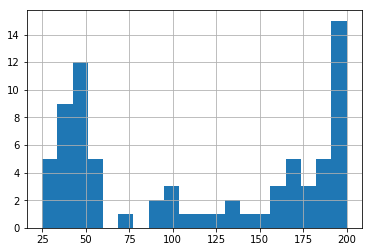

In [16]:
#频率分布情况
data[key1].hist(bins=20)

In [28]:
#频率分布情况，分组区间
gcut = pd.cut(data[key1],10,right=False)
gcut_count = gcut.value_counts(sort=False)
data['{}分组区间'.format(key1)] = gcut_count
data.head() 

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,NaN
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,NaN
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,NaN
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,NaN
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,NaN


In [38]:
#区间出现频率

r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns={gcut_count.name:'频数'},inplace=True)
r_zj['频率']=r_zj['频数']/r_zj['频数'].sum()
r_zj['累积频率']=r_zj['频率'].cumsum()
r_zj['频率%'] = r_zj['频率'].apply(lambda x:'{:.2f}%'.format(x*100))
r_zj['累积频率%'] = r_zj['累积频率'].apply(lambda x:'{:.2f}%'.format(x*100))
r_zj.style.bar(subset=['频率','累积频率'])

,频数,频率,累积频率,频率%,累积频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%,41.33%
"[60.0, 77.5)",1,0.0133333,0.426667,1.33%,42.67%
"[77.5, 95.0)",2,0.0266667,0.453333,2.67%,45.33%
"[95.0, 112.5)",4,0.0533333,0.506667,5.33%,50.67%
"[112.5, 130.0)",2,0.0266667,0.533333,2.67%,53.33%
"[130.0, 147.5)",3,0.04,0.573333,4.00%,57.33%
"[147.5, 165.0)",4,0.0533333,0.626667,5.33%,62.67%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%,73.33%
"[182.5, 200.175)",20,0.266667,1,26.67%,100.00%


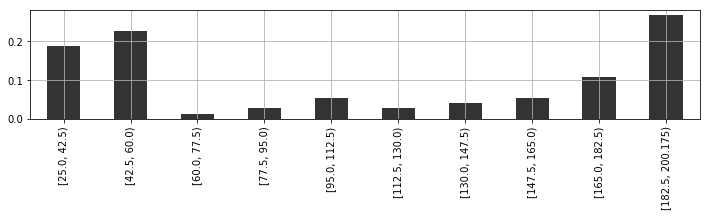

In [41]:
#直方图
r_zj['频率'].plot(kind='bar',
                figsize=(12,2),
                grid = True,
                color = 'k',
                alpha=0.8)

